# Multiple Linear Regression Bike Sharing Assignment

# Submitted by Manas Ranjan Das

In [1]:
# Problem Statement
#-------------------------------------------Business Goal-------------------------------------------------------
#There is a requirement to model the demand for shared bikes with the available independent variables. 
#It will be used by the management to understand how exactly the demands vary with different features. 
#They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
#Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [3]:
#------------------------------------------Stpes to complete the Modelling--------------------------------------

#1. Reading Understanding and visualising the data
#2. Preparing the data for modeling ( train_test_split, resclaaing etc.)
#3. Training the model
#4. Residual analysis
#5. Prediction and evalution on the test set 

In [5]:
#Import all the require librareis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading the data from shared dataset
#Reading Understanding and visualising the data
bike_df = pd.read_csv('Downloads/day.csv',encoding='ISO-8859-1',low_memory=False)

In [9]:
#Overviewing top 5 rows with head command
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Find out dataset shape and information
bike_df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [13]:
# Find out the dataset shape and information
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#Shape of a given Bike sharing dataset
bike_df.shape
# There are 730 rows and 16 columns in the data set.

(730, 16)

In [17]:
# Descriptive insights of the Bike_df dataframe 
bike_df.info()
#There are no null values in any of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [19]:
# Step2: DATA CleanUP
#we find some columns have missing values.Hence we analyze it to decide whether to keep them or drop them
#We will perform cleanup of NULLs from rows and columns associated with the loan dataframe

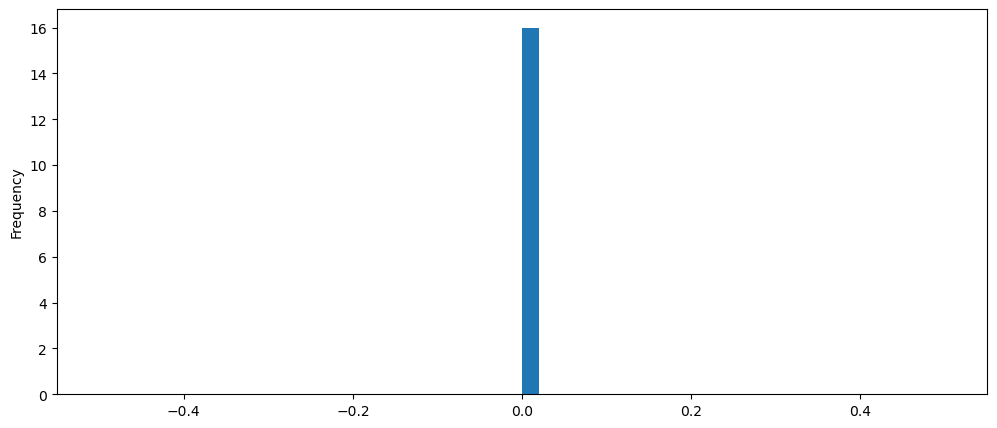

In [21]:
subbike = bike_df.isnull().sum()
subbike
subbike.plot(kind='hist', bins=50, figsize = (12,5))
plt.show()

In [23]:
#Column needs to drop
#instant > is just a row instance identifier which has no significance in our analysis.
#dteday  > is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
#casual and 'registered' > variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [25]:
drop_cols = ['instant', 'dteday','casual','registered']
bike_df.drop(drop_cols, axis=1, inplace=True)

In [29]:
#Overviewing top 5 rows with head command after removal of unwanted columns
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
# Data review after removal of unnecessary columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [33]:
bike_df.temp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: temp
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [35]:
bike_df.atemp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: atemp
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [37]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [39]:
#Observations:
    ## Find the corelation for all the columns from Bike updated data set.
    ## The temp and atemp are directly correlated among each other. 
    ## Will retain temp and drop atemp column.

In [41]:
bike_df.drop(['atemp'], axis=1, inplace=True)
#Drop the atemp column as highly coreleated with temp

In [43]:
#Overviewing top 5 rows with head command after removal of highly coreleated column
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Step 3 : EDA calculation

In [45]:
# Identify categorical variables from the dataset
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
# Convert the dtype of the categorical variables
bike_df[cat_vars] = bike_df[cat_vars].astype('category')

In [47]:
bike_df[cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 6.5 KB


In [51]:
# Identify numeric variables from dataset
num_vars = ['temp', 'hum','windspeed','cnt']
bike_df.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


## Data mapping for categorical columns
1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weekday : day of the week, 7 variables ( 0 to 6 ) (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
3. mnth : month ( 1 to 12), 12 categorical values denoting for months Jan to Dec
4. weathersit : 4 categorical values as follows (1: Clear-FewClouds, 2: Mist-Cloudy, 3: LightSnow-LightRain, 4: HeavyRain-IcePallets)

In [53]:
#Mapping of columns
# season column
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# weekday column
bike_df['weekday'] = bike_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
# mnth column 
bike_df['mnth'] = bike_df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})
# weathersit column
bike_df['weathersit'] = bike_df['weathersit'].map({1: 'Clear-FewClouds', 2: 'Mist-Cloudy', 3: 'LightSnow-LightRain', 4: 'HeavyRain-IcePallets'})

In [55]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist-Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist-Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear-FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear-FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear-FewClouds,9.305237,43.6957,12.522300,1600


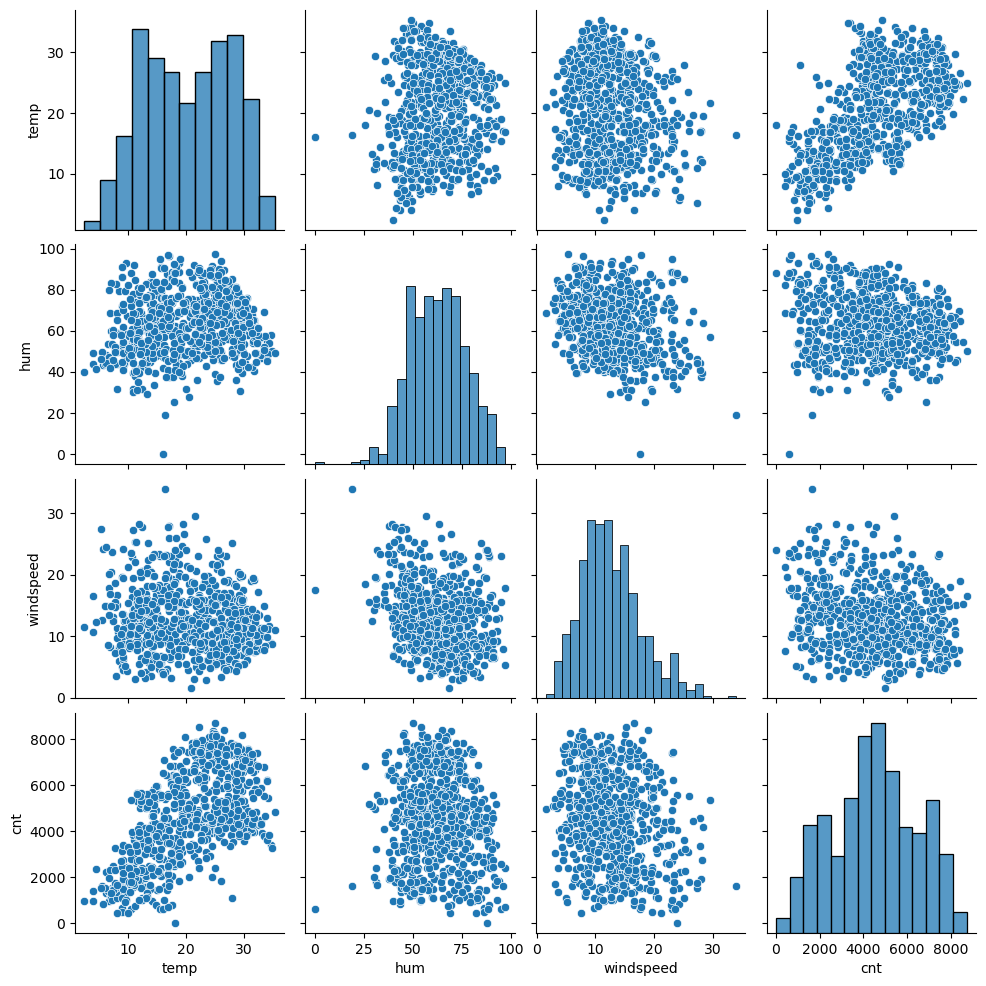

In [57]:
#visualising with numeric variables
sns.pairplot(bike_df)
plt.show()
#We can see, the temp has highest corelation with variable cnt.

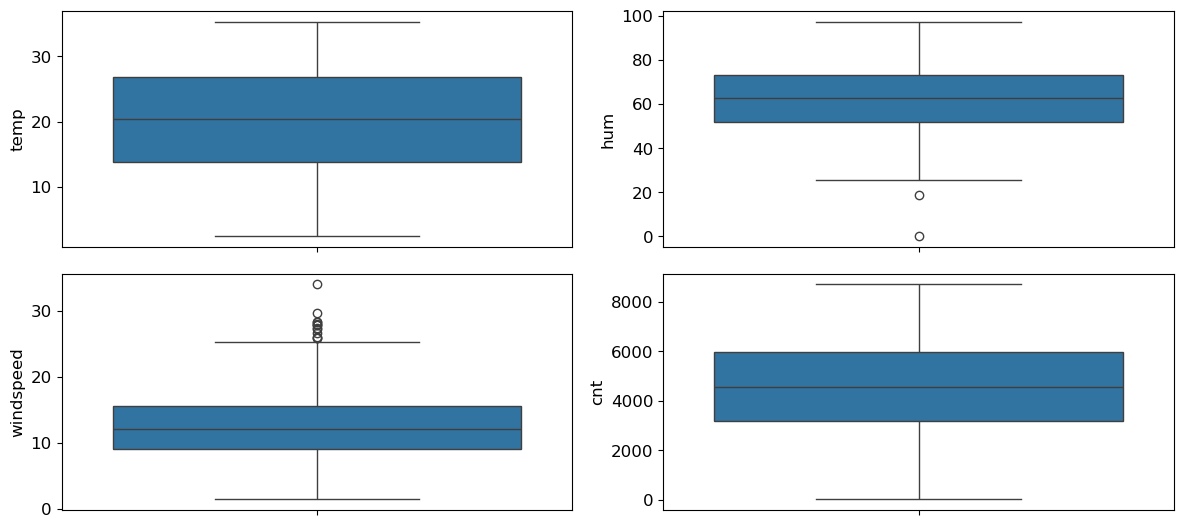

In [58]:
# selecting numerical variables through Box Plot
var = bike_df.select_dtypes(exclude = 'category').columns
col = 2
row = len(var)//col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(bike_df[i[1]])    
plt.tight_layout()   
plt.show()

<Axes: xlabel='windspeed', ylabel='cnt'>

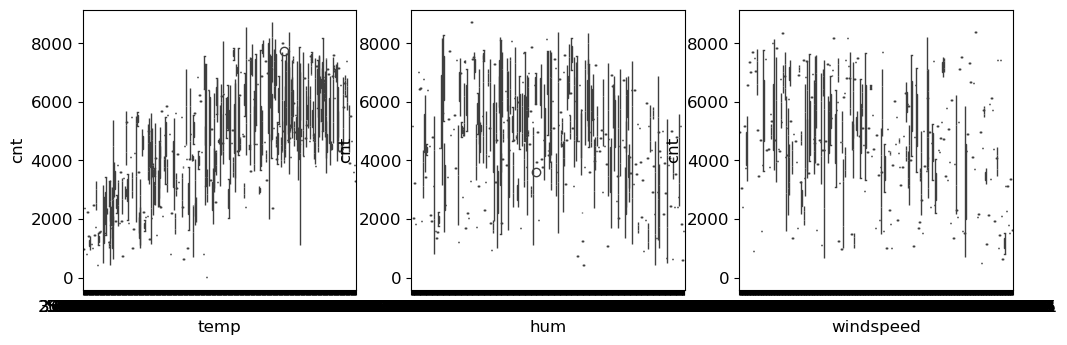

In [61]:
#num_vars = ['temp', 'hum','windspeed','cnt']
plt.figure(figsize = ( 12,8))
plt.subplot(2,3,1)
sns.boxplot(x = 'temp', y = 'cnt', data = bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'hum', y = 'cnt', data = bike_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'windspeed', y = 'cnt', data = bike_df)


In [63]:
# Observations: From the above plots, we can see the hum and windspeed are having outliers.

In [65]:
# Calculate to find the outliers percentage 
def calculate_outlier(col):
    iqr = bike_df[col].quantile(0.75)-bike_df[col].quantile(0.25)
    q1 = bike_df[col].quantile(0.75)+iqr*1.5
    q3 = bike_df[col].quantile(0.25)-iqr*1.5
    percentage_otlr = ((bike_df[col]<q3).sum()+(bike_df[col]>q1).sum())/len(bike_df[col])*100
    percentage_otlr = round(percentage_otlr,3)
    return(percentage_otlr)

print('% of outlier-(hum): ', calculate_outlier('hum'))
print('% of outlier-(windspeed): ', calculate_outlier('windspeed'))

% of outlier-(hum):  0.274
% of outlier-(windspeed):  1.781


In [67]:
# The Percentage of outliers for hum and windspeed are 0.274 and 1.781 and it is very low.
# Due to Low percentage, no need to take action on it.

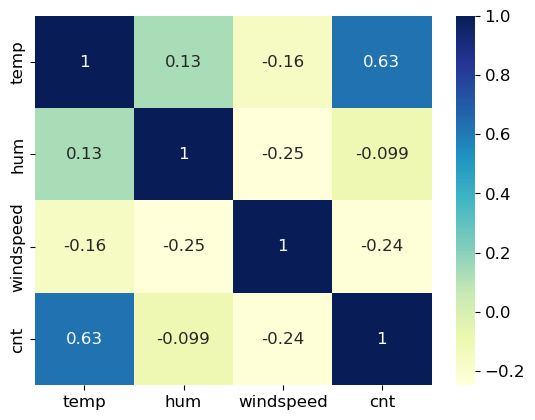

In [69]:
# Checking continuous variables relationship with each other( Corellation between numerical variables)
#num_vars = ['temp', 'hum','windspeed','cnt']
sns.heatmap(bike_df[num_vars].corr(), annot = True, cmap='YlGnBu')
plt.show()
#temp has highest corellation with cnt.

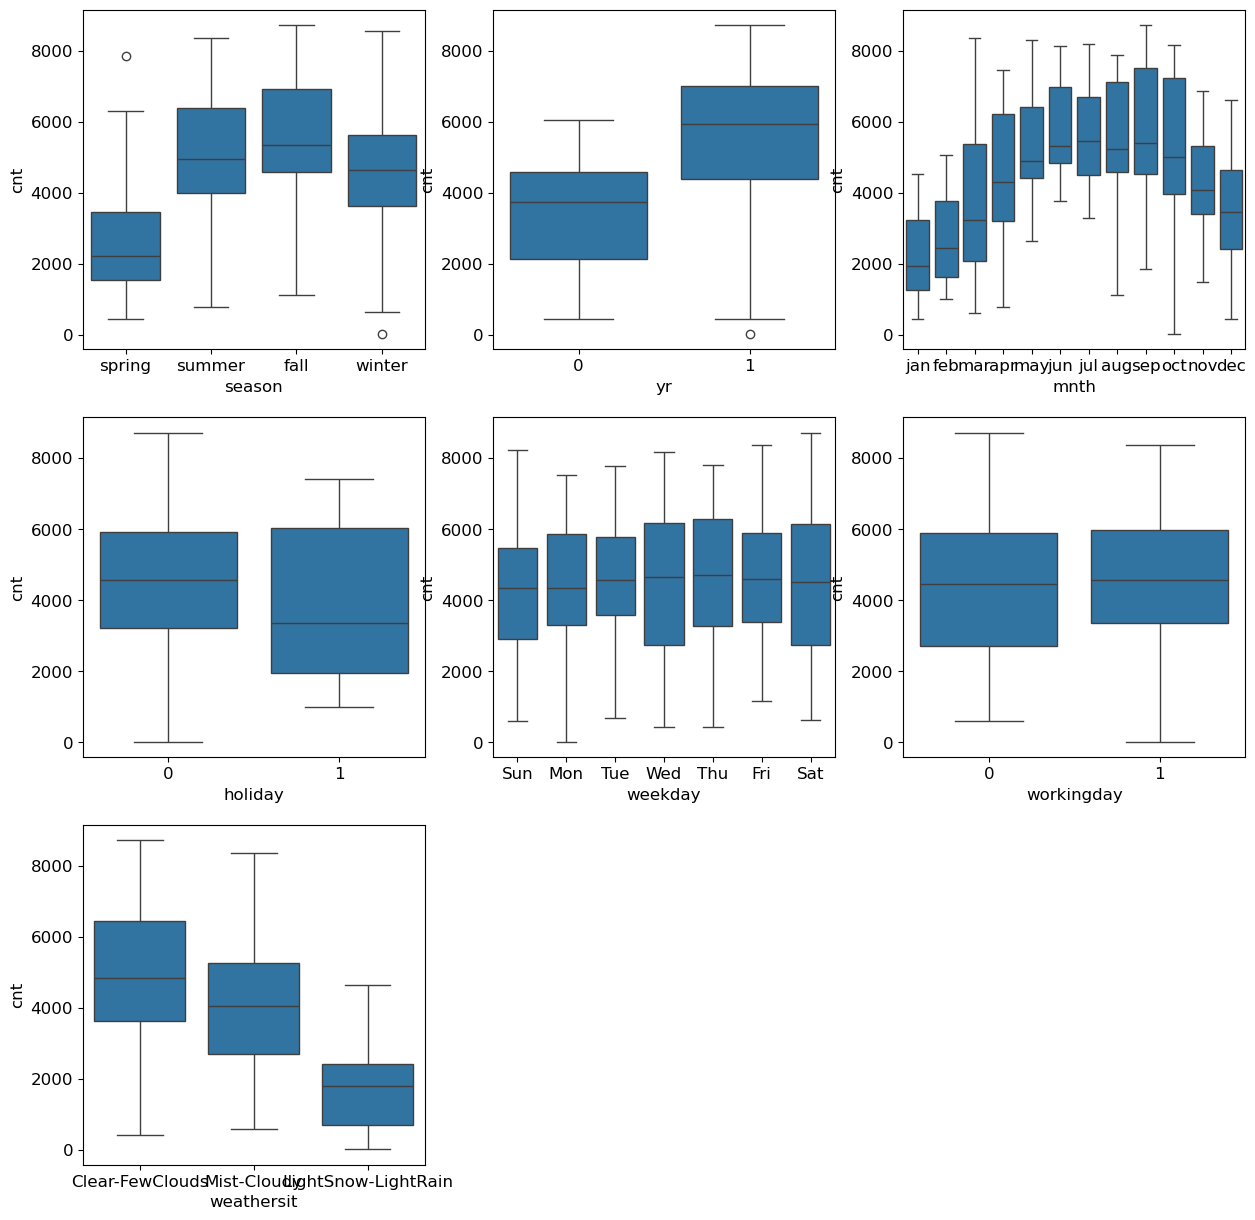

In [71]:
# Boxplot for categorical variables to see demands
#cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

Observations:
1. Season vs cnt comparison: the fall season has highest demand against other seasons towards rental bikes.
2. Yr vs cnt comparison: for 2019 year, demand has been grown against 2018.
3. Demand vs cnt comparison : Lowest demand > jan and Highest demand >september. Thdemans vs cmt is bellow curve of grow through the year.
4. holiday vs cnt comparison : during holiday period, the demand has been decreasing.
5. Weekday vs cnt comparison : there is not much variance on demand.
6. weathershit vs cnt comparison: the (Clear, Few clouds, Partly cloudy, Partly cloudy) weather has highest demand with respect to others.
7. workingday vs cnt comparison : there is not much variance on demand.

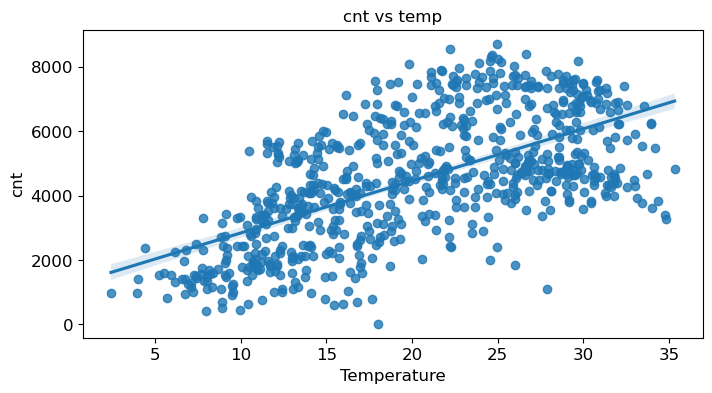

In [73]:
# Scatterplot for numerical variables to see demand
# cnt vs temp scatterplot 
plt.figure(figsize=(8,4))
plt.title("cnt vs temp",fontsize=12)
sns.regplot(x='temp', y = 'cnt',data=bike_df)
plt.xlabel("Temperature")
plt.show()

In [75]:
## Observation on cnt vs temp comparison:
    # The count of biles is positively correlated to temp.
    # They have linear relation.

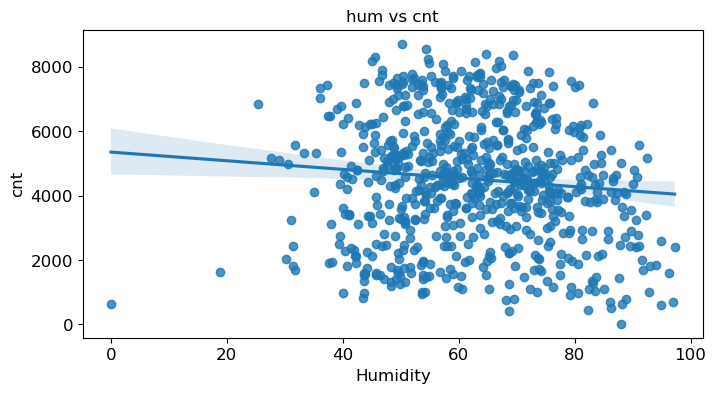

In [77]:
# cnt vs hum scatterplot 
plt.figure(figsize=(8,4))
plt.title("hum vs cnt",fontsize=12)
sns.regplot(x='hum', y = 'cnt',data=bike_df)
plt.xlabel("Humidity")
plt.show()

In [79]:
#Observation on hum vs cnt comparison:
    # humidity vs cnt have more scattered data.
    # The cnt is decreasing with increase in humidity.

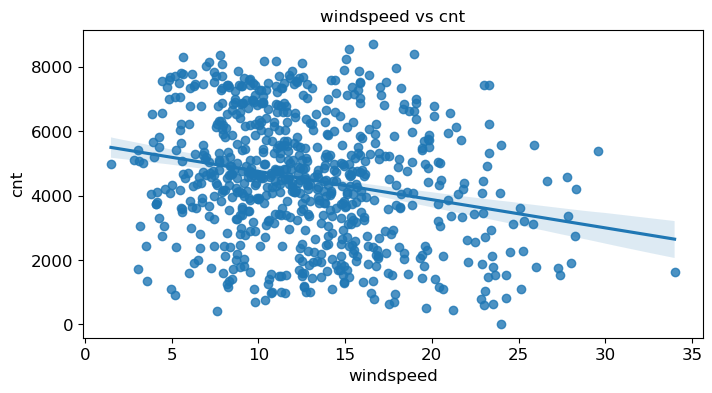

In [81]:
# cnt vs windspeed scatterplot 
plt.figure(figsize=(8,4))
plt.title("windspeed vs cnt",fontsize=12)
sns.regplot(x='windspeed', y = 'cnt',data=bike_df)
plt.xlabel("windspeed")
plt.show()

In [83]:
## Observation on windspeed vs cnt comparison:
    # windspeed vs cnt have more scattered data.
    # The cnt is decreasing with increase in windspeed.

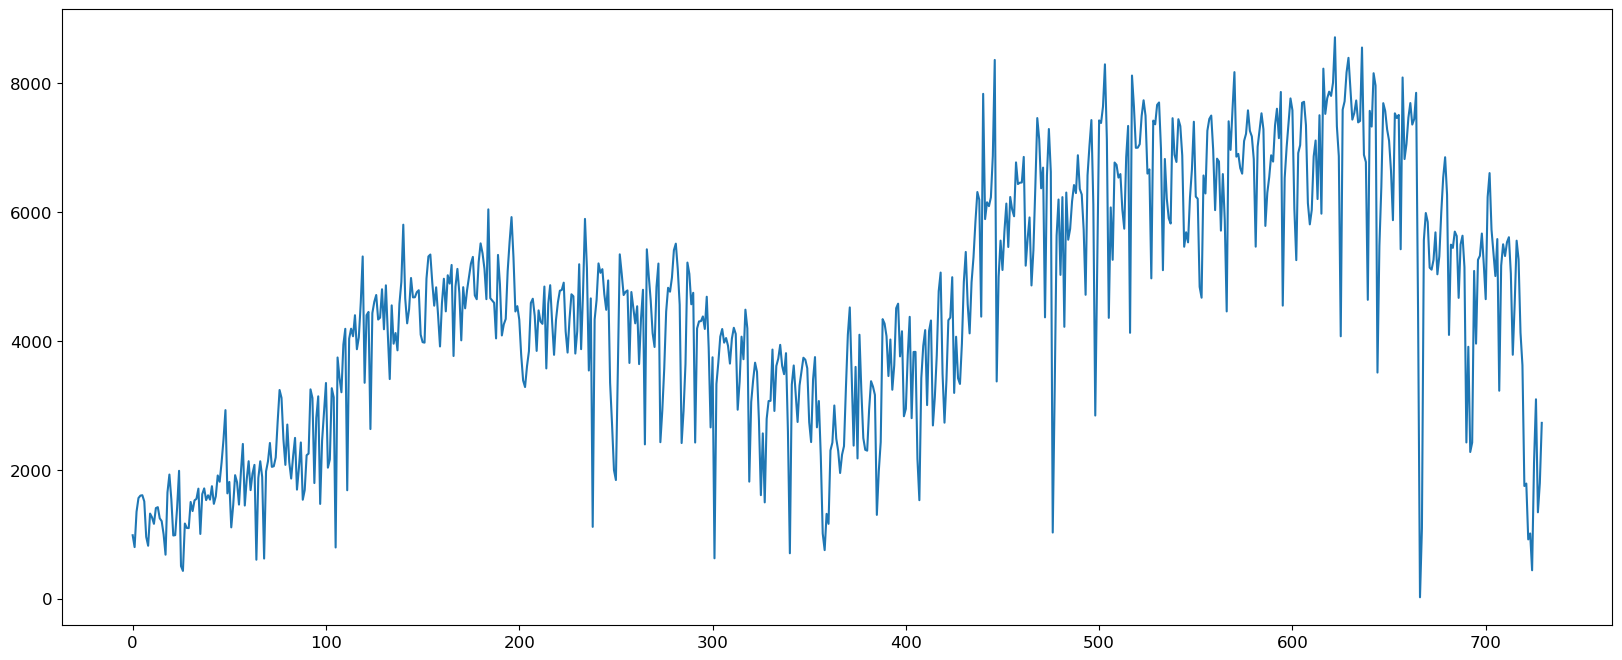

In [85]:
#Univariate Analysis
# Visualization for pattern of demand over span of 2018-19
plt.figure(figsize=(20,8))
plt.plot(bike_df.cnt)
plt.show()

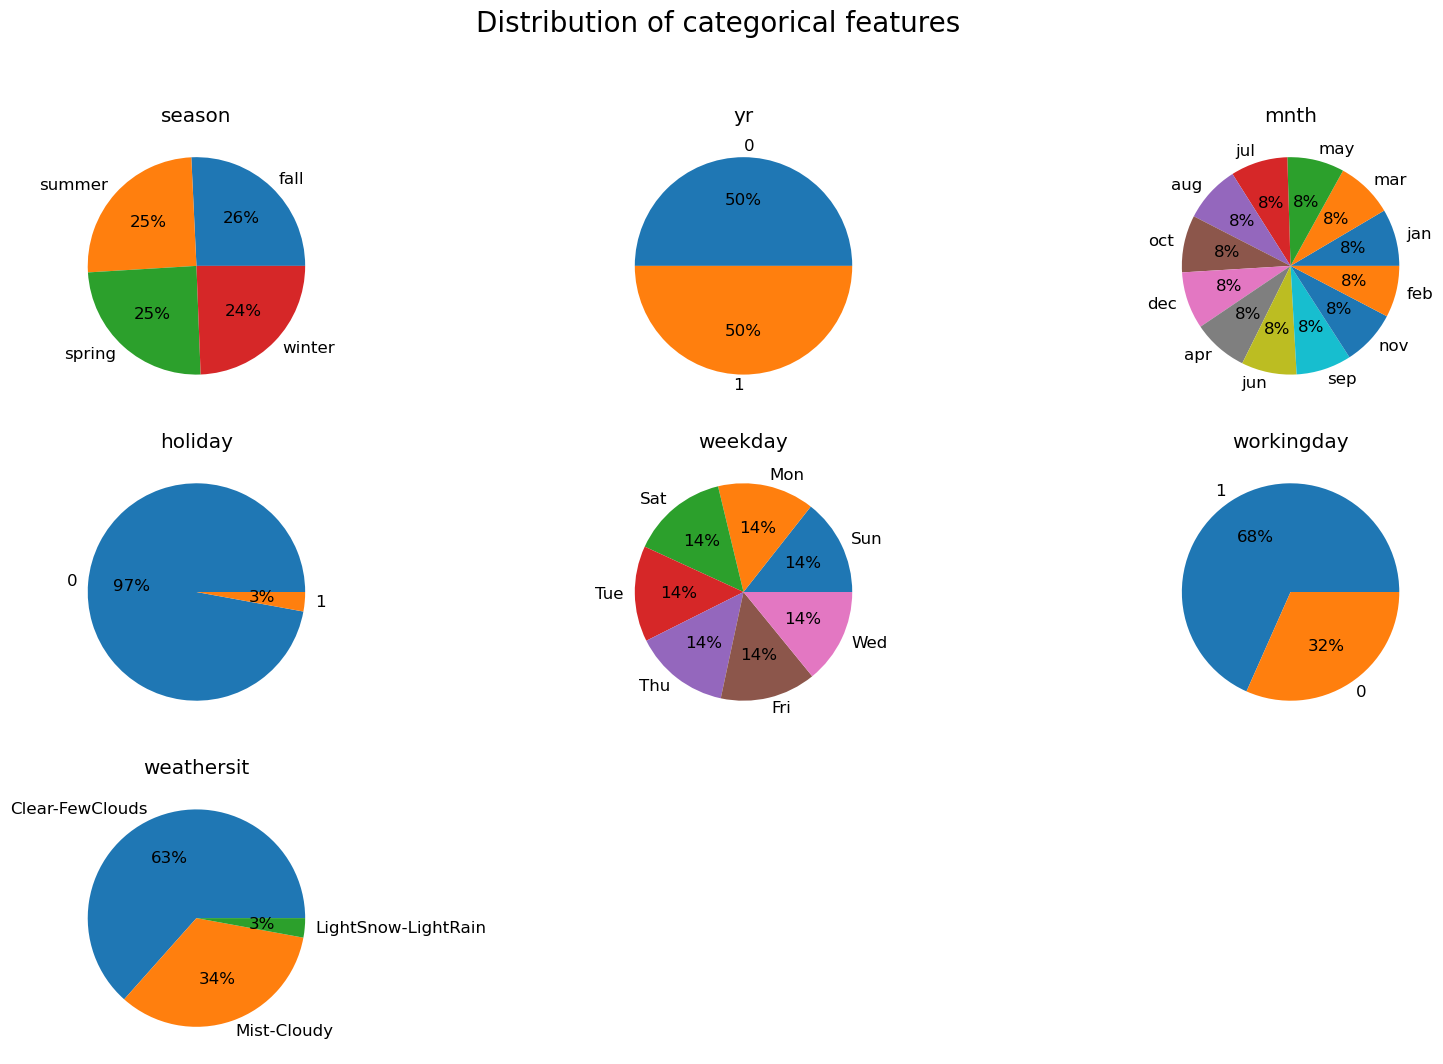

In [87]:
# Distribution of categorical features
df_pieplt=bike_df.select_dtypes(include='category')
plt.figure(figsize=(20,12))
plt.suptitle('Distribution of categorical features', fontsize=20)
for i in range(1,df_pieplt.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df_pieplt.columns.values[i-1])
    values=df_pieplt.iloc[:,i-1].value_counts(normalize=True).values
    index=df_pieplt.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
plt.show()

In [89]:
## Observations:
    # Seasons: Business is operating similar days in all the seasons.
    # Yr: Number of days of operation in both the years are almost the same.
    # Month: Business was operating similar days in all 12 months.
    # Holiday: Business is operating in all most of the days except 3%.
    # weekdays: Business is operating with similar percentage in all weekdays.
    # Workingday: Bisuness was operating in 68% for working days and 32% for nonworking days

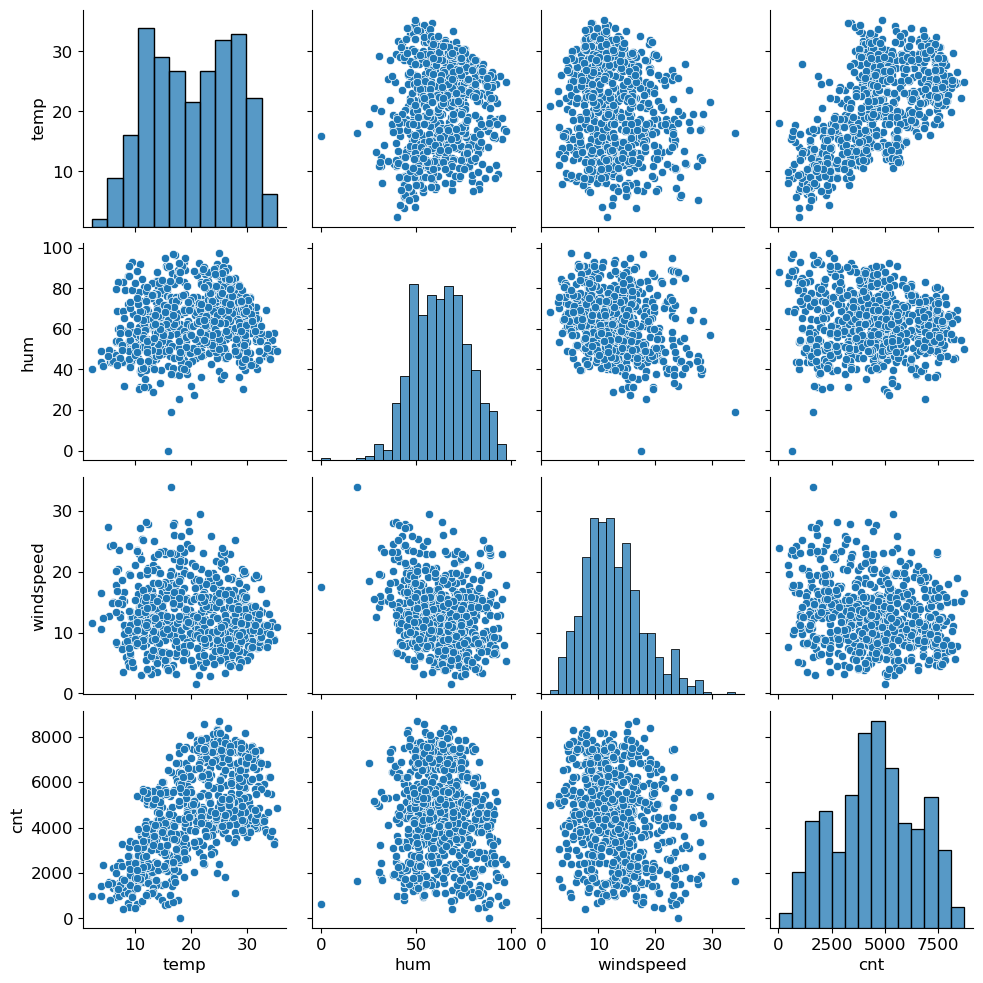

In [91]:
#Bivariate Analysis
sns.pairplot(bike_df.select_dtypes(['int64','float64']))
plt.show()
# temp has Highest positive correlation wrt cnt

## Step4: Data Preparation for Linear Regression 

In [93]:
#Overviewing top 5 rows with head command
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist-Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist-Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear-FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear-FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear-FewClouds,9.305237,43.6957,12.522300,1600


In [95]:
# get dummy variables for season, weekday, mnth and weathersit
category_vars = ['season','mnth','weekday','weathersit']
dummy_vars = pd.get_dummies(bike_df[category_vars],drop_first=True)

# We concatenate the dummy dataframe with original dataframe
bike_df = pd.concat([bike_df,dummy_vars], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_nov,mnth_dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
0,spring,0,jan,0,Sat,0,Mist-Cloudy,14.110847,80.5833,10.749882,...,False,False,False,False,False,False,False,True,True,False
1,spring,0,jan,0,Sun,0,Mist-Cloudy,14.902598,69.6087,16.652113,...,False,False,False,False,False,False,False,False,True,False
2,spring,0,jan,0,Mon,1,Clear-FewClouds,8.050924,43.7273,16.636703,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,jan,0,Tue,1,Clear-FewClouds,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,False,False,False
4,spring,0,jan,0,Wed,1,Clear-FewClouds,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,False,False,False


In [97]:
# From list of N categories, dropping the columns as (n-1) dummies.
bike_df.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

In [99]:
#shape of the dataframe
bike_df.shape

(730, 29)

In [101]:
#shape of the new dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_summer                   730 non-null    bool    
 8   season_fall                     730 non-null    bool    
 9   season_winter                   730 non-null    bool    
 10  mnth_feb                        730 non-null    bool    
 11  mnth_mar                        730 non-null    bool    
 12  mnth_apr              

In [103]:
# We convert categorical columns to numeric 
bike_df[['yr','holiday','workingday']]= bike_df[['yr','holiday','workingday']].astype('uint8')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    bool   
 8   season_fall                     730 non-null    bool   
 9   season_winter                   730 non-null    bool   
 10  mnth_feb                        730 non-null    bool   
 11  mnth_mar                        730 non-null    bool   
 12  mnth_apr                        730 

In [105]:
# Convert the True/False variables to 1/0
#bike_df = bike_df * 1
bike_df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [109]:
#Info for the bike_df dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    bool   
 8   season_fall                     730 non-null    bool   
 9   season_winter                   730 non-null    bool   
 10  mnth_feb                        730 non-null    bool   
 11  mnth_mar                        730 non-null    bool   
 12  mnth_apr                        730 

## Model building

In [111]:
#splitting data into train and test using tarin-test-split approach

In [113]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [115]:
## Scalling of Data
#Scalling of training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    uint8  
 1   holiday                         510 non-null    uint8  
 2   workingday                      510 non-null    uint8  
 3   temp                            510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   cnt                             510 non-null    int64  
 7   season_summer                   510 non-null    bool   
 8   season_fall                     510 non-null    bool   
 9   season_winter                   510 non-null    bool   
 10  mnth_feb                        510 non-null    bool   
 11  mnth_mar                        510 non-null    bool   
 12  mnth_apr                        510 non

In [117]:
#We are using Min-Max scaling (normalisation) to scale the dataset( both train and test)
scaler = MinMaxScaler()

# fit and transform on training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,True,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,False,False,False,...,False,False,False,False,False,False,False,True,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,False,False,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,True,False,False,...,False,False,False,False,False,False,False,True,True,False
111,0,0,1,0.345824,0.751824,0.380981,0.191095,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [119]:
# Creating X and y dataframe for train/test set
y_train = df_train.pop('cnt')
X_train = df_train

y_test = df_test.pop('cnt')
X_test = df_test

X_train.head()
#X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_feb,...,mnth_nov,mnth_dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
576,1,0,1,0.815169,0.725633,0.264686,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
728,1,0,0,0.245101,0.498067,0.663106,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
111,0,0,1,0.345824,0.751824,0.380981,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


## Build a Model using Recusive feature elemination (RFE)

In [121]:
# Apply RFE to select top 15 varibles
#Appl
lm = LinearRegression()
# fit model
lm.fit(X_train, y_train)
# run RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_aug', 'mnth_sep',
       'mnth_oct', 'weekday_Sat', 'weathersit_Mist-Cloudy',
       'weathersit_LightSnow-LightRain'],
      dtype='object')

In [143]:
# Initiate the building model using statsmodel concepts
# Set X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    uint8  
 1   holiday                         510 non-null    uint8  
 2   workingday                      510 non-null    uint8  
 3   temp                            510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   season_summer                   510 non-null    bool   
 7   season_fall                     510 non-null    bool   
 8   season_winter                   510 non-null    bool   
 9   mnth_aug                        510 non-null    bool   
 10  mnth_sep                        510 non-null    bool   
 11  mnth_oct                        510 non-null    bool   
 12  weekday_Sat                     510 non

In [145]:
# Create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add the constant
    X_train_sm = sm.add_constant(X_train_sm)
    # Create fit model
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [147]:
#create a Dataframe that will contain the names of all the feature variables and their respective 
def vif_calculate(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [149]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    uint8  
 1   holiday                         510 non-null    uint8  
 2   workingday                      510 non-null    uint8  
 3   temp                            510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   season_summer                   510 non-null    bool   
 7   season_fall                     510 non-null    bool   
 8   season_winter                   510 non-null    bool   
 9   mnth_aug                        510 non-null    bool   
 10  mnth_sep                        510 non-null    bool   
 11  mnth_oct                        510 non-null    bool   
 12  weekday_Sat                     510 non

In [151]:
# We convert categorical columns to numeric 
X_train_rfe[['season_summer','season_fall','season_winter','mnth_aug','mnth_sep','mnth_oct', 'weekday_Sat','weathersit_Mist-Cloudy','weathersit_LightSnow-LightRain']]= X_train_rfe[['season_summer','season_fall','season_winter','mnth_aug','mnth_sep','mnth_oct', 'weekday_Sat','weathersit_Mist-Cloudy','weathersit_LightSnow-LightRain']].astype('uint8')
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    uint8  
 1   holiday                         510 non-null    uint8  
 2   workingday                      510 non-null    uint8  
 3   temp                            510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   season_summer                   510 non-null    uint8  
 7   season_fall                     510 non-null    uint8  
 8   season_winter                   510 non-null    uint8  
 9   mnth_aug                        510 non-null    uint8  
 10  mnth_sep                        510 non-null    uint8  
 11  mnth_oct                        510 non-null    uint8  
 12  weekday_Sat                     510 non

In [153]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sep,mnth_oct,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [155]:
# We create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          5.17e-191
Time:                        17:37:31   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1952      0.029      6.790      0.000       0.139       0.252
yr                                 0.2301      0.008     28.743      0.000       0.214       0.246
holiday                           -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday                         0.0445      0.012      3.856      0.000       0.022       0.067
temp                               0.4972      0.034     14.821      0.000       0.431       0.563
hum                               -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed                         -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_summer                      0.1183      0.015      8.038      0.000       0.089       0.147
season_fall                        0.0292      0.022      1.329      0.184      -0.014       0.072
season_winter                      0.1430      0.013     10.671      0.000       0.117       0.169
mnth_aug                           0.0473      0.017      2.732      0.007       0.013       0.081
mnth_sep                           0.1176      0.017      6.876      0.000       0.084       0.151
mnth_oct                           0.0416      0.017      2.391      0.017       0.007       0.076
weekday_Sat                        0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_Mist-Cloudy            -0.0577      0.010     -5.564      0.000      -0.078      -0.037
weathersit_LightSnow-LightRain    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# VIF calculation
print(vif_calculate(X_train_rfe))

                          features    VIF
3                             temp  24.07
4                              hum  17.44
7                      season_fall   8.19
2                       workingday   5.05
5                        windspeed   3.88
6                    season_summer   3.46
8                    season_winter   2.85
13          weathersit_Mist-Cloudy   2.15
0                               yr   2.04
12                     weekday_Sat   1.91
9                         mnth_aug   1.85
11                        mnth_oct   1.64
10                        mnth_sep   1.51
14  weathersit_LightSnow-LightRain   1.20
1                          holiday   1.16


In [137]:
# Remove P value variables >0.05  and update model
#pvalue = lm_1.pvalues
#while(max(pvalue)>0.05):
 #   maxp_var = pvalue[pvalue == pvalue.max()].index
  #  print('Removed variable:' , maxp_var[0], 'P value:', round(max(pvalue),3))
    
    # drop variable with high p value
   # X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
   # lm_1 = sm_linearmodel(X_train_rfe)
   # pvalue = lm_1.pvalues

## Observation
#1: VIF is very High for temp and hum.

#2: R-squared and R-Squared-adjusted : 0.848 and 0.843. 

#3: As per above output, most of the varaibles are having pvalue < 0.05.

#4: Highest pvalue in the model; season_fall : 0.184. As the pvalue is >0.05 hence mnth_may is dropped from dataset.

In [233]:
#  features    VIF
#  hum         17.44
#  temp        24.07
# Both hum and temp features are having highest VIF . As temp has high correclation with cnt, so it can not be removed.
# Hence hum feature will be removed.

In [160]:
X_train_hum = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model
lm_2 = sm_linearmodel(X_train_hum)
lm_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          4.58e-188
Time:                        17:43:34   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1003      0.019      5.190      0.000       0.062       0.138
yr                                 0.2342      0.008     28.911      0.000       0.218       0.250
holiday                           -0.0524      0.027     -1.914      0.056      -0.106       0.001
workingday                         0.0475      0.012      4.055      0.000       0.025       0.071
temp                               0.4627      0.033     13.931      0.000       0.397       0.528
windspeed                         -0.1502      0.025     -6.075      0.000      -0.199      -0.102
season_summer                      0.1216      0.015      8.124      0.000       0.092       0.151
season_fall                        0.0425      0.022      1.921      0.055      -0.001       0.086
season_winter                      0.1390      0.014     10.210      0.000       0.112       0.166
mnth_aug                           0.0417      0.018      2.374      0.018       0.007       0.076
mnth_sep                           0.1079      0.017      6.244      0.000       0.074       0.142
mnth_oct                           0.0391      0.018      2.207      0.028       0.004       0.074
weekday_Sat                        0.0581      0.015      3.940      0.000       0.029       0.087
weathersit_Mist-Cloudy            -0.0838      0.009     -9.675      0.000      -0.101      -0.067
weathersit_LightSnow-LightRain    -0.2957      0.025    -12.053      0.000      -0.344      -0.247
==============================================================================
Omnibus:                       77.284   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.987
Skew:                          -0.749   Prob(JB):                     1.13e-45
Kurtosis:                       5.738   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# Calculate VIF after removing hum feature
print(vif_calculate(X_train_hum))

                          features    VIF
3                             temp  16.82
6                      season_fall   7.78
2                       workingday   4.45
4                        windspeed   3.72
5                    season_summer   3.42
7                    season_winter   2.75
0                               yr   2.04
8                         mnth_aug   1.85
11                     weekday_Sat   1.78
10                        mnth_oct   1.63
12          weathersit_Mist-Cloudy   1.55
9                         mnth_sep   1.50
1                          holiday   1.13
13  weathersit_LightSnow-LightRain   1.10


In [164]:
#Hum has been removed and stats has been updated.
#  features    VIF
#  temp         16.82
#  season_fall  7.78
# Both season_fall and temp features are having highest VIF . As temp has high correclation with cnt, so it can not be removed.
# Season_fall is too hvaing Pvalue > 0.05 (0.055)
# Hence season_fall feature will be removed.

In [166]:
# Drop variable season_fall
X_train_season = X_train_hum.drop(['season_fall'],axis = 1)

# # Create stats model
lm_3 = sm_linearmodel(X_train_season)
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          1.97e-188
Time:                        17:46:05   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0937      0.019      4.914      0.000       0.056       0.131
yr                                 0.2331      0.008     28.769      0.000       0.217       0.249
holiday                           -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday                         0.0473      0.012      4.026      0.000       0.024       0.070
temp                               0.5106      0.022     23.229      0.000       0.467       0.554
windspeed                         -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_summer                      0.1019      0.011      9.325      0.000       0.080       0.123
season_winter                      0.1267      0.012     10.524      0.000       0.103       0.150
mnth_aug                           0.0539      0.016      3.281      0.001       0.022       0.086
mnth_sep                           0.1185      0.016      7.226      0.000       0.086       0.151
mnth_oct                           0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_Sat                        0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_Mist-Cloudy            -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_LightSnow-LightRain    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
# Calculate VIF
print(vif_calculate(X_train_season))

                          features   VIF
3                             temp  6.39
2                       workingday  4.40
4                        windspeed  3.60
0                               yr  2.02
6                    season_winter  2.00
5                    season_summer  1.83
10                     weekday_Sat  1.77
9                         mnth_oct  1.60
7                         mnth_aug  1.59
11          weathersit_Mist-Cloudy  1.55
8                         mnth_sep  1.34
1                          holiday  1.12
12  weathersit_LightSnow-LightRain  1.10


In [170]:
#Hum has been removed and stats has been updated.
#  features    VIF
#  temp         6.39
#  workingday  4.40
# Both workingday and temp features are having highest VIF where as they are adjustable. NO need for removal any variable based on VIF.
# Now we can validate on P value
# mnth_oct has P value > 0.05, we can remove and validate the data.

In [172]:
# We drop the varible having high VIF
X_train_oct = X_train_season.drop(['mnth_oct'],axis = 1)

# We create stats model and look for summary
lm_4 = sm_linearmodel(X_train_oct)
lm_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          8.64e-189
Time:                        17:51:20   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0903      0.019      4.740      0.000       0.053       0.128
yr                                 0.2327      0.008     28.651      0.000       0.217       0.249
holiday                           -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday                         0.0463      0.012      3.933      0.000       0.023       0.069
temp                               0.5188      0.022     23.980      0.000       0.476       0.561
windspeed                         -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_summer                      0.1004      0.011      9.183      0.000       0.079       0.122
season_winter                      0.1382      0.011     13.148      0.000       0.118       0.159
mnth_aug                           0.0510      0.016      3.104      0.002       0.019       0.083
mnth_sep                           0.1136      0.016      6.991      0.000       0.082       0.146
weekday_Sat                        0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_Mist-Cloudy            -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_LightSnow-LightRain    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# Calculate VIF
print(vif_calculate(X_train_oct))

                          features   VIF
3                             temp  6.20
2                       workingday  4.35
4                        windspeed  3.60
0                               yr  2.02
5                    season_summer  1.82
9                      weekday_Sat  1.76
7                         mnth_aug  1.58
10          weathersit_Mist-Cloudy  1.54
6                    season_winter  1.52
8                         mnth_sep  1.31
1                          holiday  1.12
11  weathersit_LightSnow-LightRain  1.08


In [176]:
## Observations:
# After dropping the variable mnth_oct and updating model, we saw R-squared: 0.840 and Adj R-squared : 0.836. 
# There is no significant change in R-squared or R2-adj.
# All variables's pvalue almost zero and all VIF is also < 5( except temp).
# No significant change in Adj R-squared for lm_3 and lm_4 after all removal of fields. 
# lm_4 as our final model for final step ( # Model predection)

## Final Model predictions

In [179]:
# Final model varibales and its coefficients
lm_final = lm_4

# Check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Coefficents of final variable
print('\nCoefficent for the variables are:')
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_sep', 'weekday_Sat', 'weathersit_Mist-Cloudy', 'weathersit_LightSnow-LightRain']

Coefficent for the variables are:
const                             0.090
yr                                0.233
holiday                          -0.056
workingday                        0.046
temp                              0.519
windspeed                        -0.151
season_summer                     0.100
season_winter                     0.138
mnth_aug                          0.051
mnth_sep                          0.114
weekday_Sat                       0.057
weathersit_Mist-Cloudy           -0.083
weathersit_LightSnow-LightRain   -0.287
dtype: float64


# residual Analysis

In [182]:
#final variables from the train dataset
X_train_res = X_train[var_final]

In [184]:
X_train_res.head()

,yr,holiday,workingday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
576,1,0,1,0.815169,0.264686,False,False,False,False,False,False,False
426,1,0,0,0.442393,0.255342,False,False,False,False,True,True,False
728,1,0,0,0.245101,0.663106,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.188475,True,False,False,False,True,True,False
111,0,0,1,0.345824,0.380981,True,False,False,False,False,True,False


In [186]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# Predict train set
y_train_pred = lm_final.predict(X_train_res)

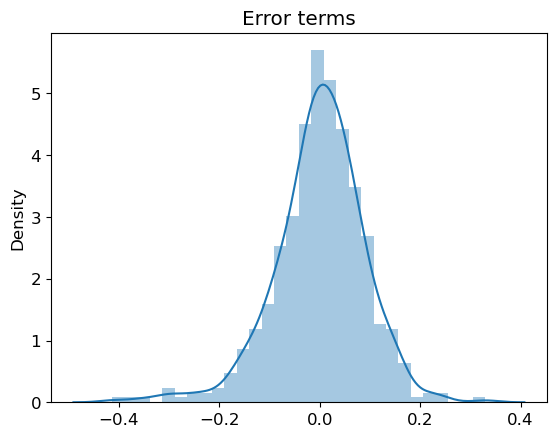

In [188]:
# distrubition plot for residue
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title('Error terms')
plt.show()

In [190]:
## Observation:
# The distribution plot shows normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

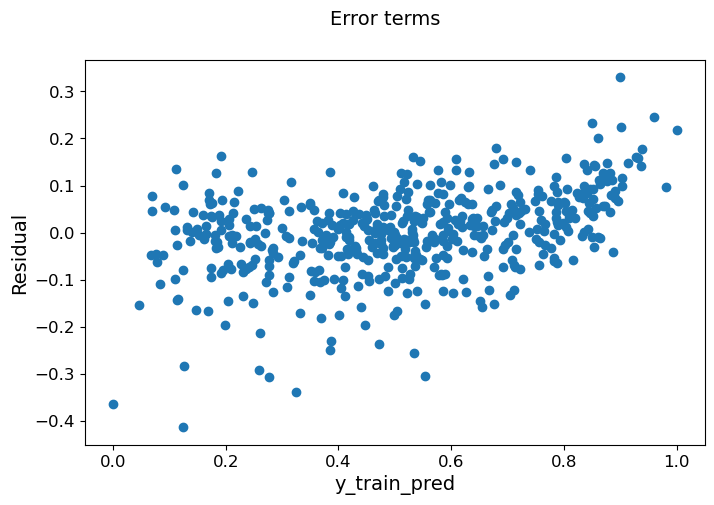

In [194]:
# finding Error terms for train set
cerror = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,residual)
fig.suptitle('Error terms', fontsize=14)               
plt.xlabel('y_train_pred', fontsize=14)                      
plt.ylabel('Residual', fontsize=14)

In [196]:
# Validate the dataframe for the test set
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_feb,...,mnth_nov,mnth_dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
184,0,1,0,0.831783,0.657364,0.084219,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.610133,0.153728,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [198]:
# Select Final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,workingday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
184,0,1,0,0.831783,0.084219,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.153728,True,False,False,False,False,False,False
299,0,0,1,0.511964,0.334206,False,True,False,False,False,True,False
221,0,0,1,0.881625,0.339570,False,False,True,False,False,False,False
152,0,0,1,0.817246,0.537414,True,False,False,False,False,False,False


In [200]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,workingday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,weekday_Sat,weathersit_Mist-Cloudy,weathersit_LightSnow-LightRain
184,1.0,0,1,0,0.831783,0.084219,False,False,False,False,False,True,False
535,1.0,1,0,1,0.901354,0.153728,True,False,False,False,False,False,False
299,1.0,0,0,1,0.511964,0.334206,False,True,False,False,False,True,False
221,1.0,0,0,1,0.881625,0.339570,False,False,True,False,False,False,False
152,1.0,0,0,1,0.817246,0.537414,True,False,False,False,False,False,False


In [202]:
# We predict test dataset
y_test_pred = lm_final.predict(X_test_sm)
y_test_pred.info()

<class 'pandas.core.series.Series'>
Index: 220 entries, 184 to 653
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
220 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [204]:
# Evalute the model on test_data
r2_test_data = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared: ', round(r2_test_data,3))

R-Squared:  0.797


In [206]:
# Evalute Adjusted R-Squared for test dataset
N_len= len(X_test)          
P_len =len(var_final)     
r2_test_data_adj = round((1-((1-r2_test_data)*(N_len-1)/(N_len-P_len-1))),3)
print('Adj. R-Squared: ', round(r2_test_data_adj,3))

Adj. R-Squared:  0.786


In [208]:
# Calculate Mean Sqare Error based on test and predicted dataset
mse_data = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error:' ,round(mse_data,4))

Mean_Squared_Error: 0.0097


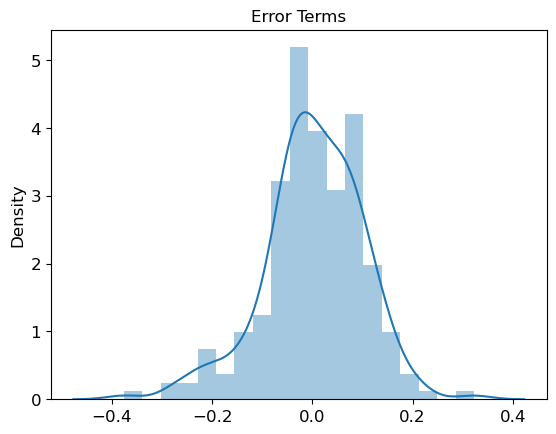

In [210]:
# plot to see Error tems  based on predicted test dataset
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=12) 
sns.distplot(res_test)
plt.show()

In [212]:
# The above distribution plot of error terms shows normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

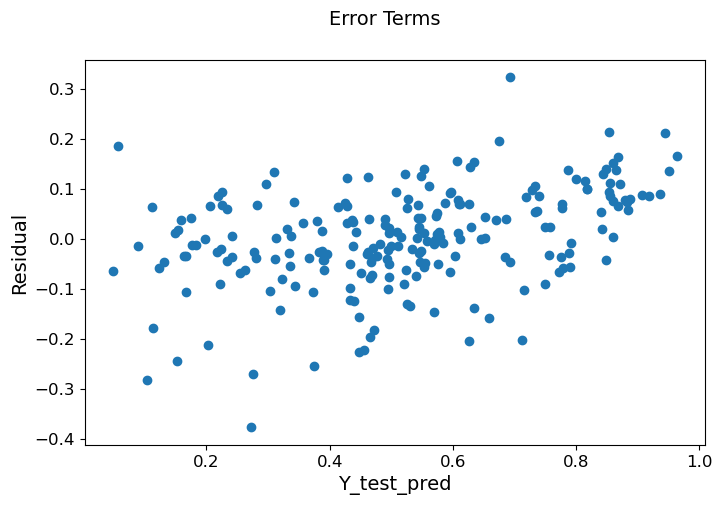

In [214]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=14)               
plt.xlabel('Y_test_pred', fontsize=14)                      
plt.ylabel('Residual', fontsize=14)  

In [216]:
# Observation : The above residual plot is random one.

Text(0, 0.5, 'y_test_pred')

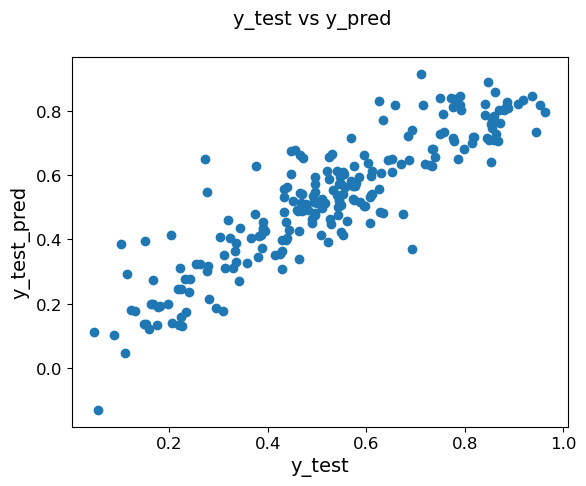

In [218]:
#y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 14)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 14) 

In [220]:
# Observation: The y_test vs y_test_pred is linear .

## Conclusion

In [225]:
# Print R Squared and adj. R Squared
print('R-Sqaured train: ', round(lm_final.rsquared,2), 'Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R-Sqaured test : ', round(r2_test_data,2), 'Adj. R-Squared test :', round(r2_test_data_adj,3))

# Print the coefficents of final varible
print('##### Coefficent for the variables are:')
print(round(lm_final.params,3))

R-Sqaured train:  0.84 Adj. R-Squared train: 0.836
R-Sqaured test :  0.8 Adj. R-Squared test : 0.786
##### Coefficent for the variables are:
const                             0.090
yr                                0.233
holiday                          -0.056
workingday                        0.046
temp                              0.519
windspeed                        -0.151
season_summer                     0.100
season_winter                     0.138
mnth_aug                          0.051
mnth_sep                          0.114
weekday_Sat                       0.057
weathersit_Mist-Cloudy           -0.083
weathersit_LightSnow-LightRain   -0.287
dtype: float64


## From R-Sqaured and adj R-Sqaured value for both Traina nd test don't have much variance and can explain overall around 80% of bike demand.
## The Coeffiencients of the variables explain the factors affecting the bike demand.

In [230]:
# The Final Model
## The three features that contribute most to bike sharing demand are
 ## Temp (0.519)
 ## weathersit :  (-0.287)
 ## year (0.233)
## These above three variables are important for any planning of Bike sharing project to improve the bike sharing demand.